# TP: Machine Learning (SIA_3611)

## TP2: Classification (4h) 

by Clément Bouvier 

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP2 is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations


## STEP 1: Feature space visualization

You will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

**TO DO 1.1**

Execute the following cells

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

[]

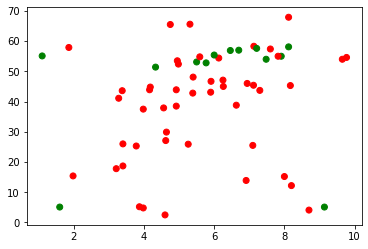

In [26]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])
np_Y=df_Y.to_numpy()

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.plot()

**QUESTION 1**

Why was the label status binarized?

Is this feature space easily separable? Justify your response

The label status has been binarized to perform easily a binary classifaction on the status

This feature space is not easily separable because we can see that green and red sample are together and some green samples are alone at each corner of the figure

**TO CODE 1.2**

Plot Total expenditure against Schooling

[]

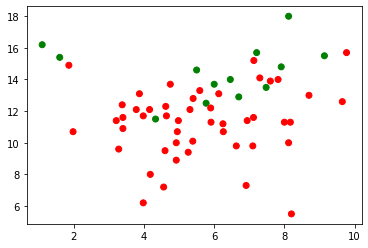

In [27]:
df_X = df1[['Total_expenditure', 'Schooling']]
np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(np_Y), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.plot()

**TO CODE 1.3**

Plot Life Expectancy against Schooling

[]

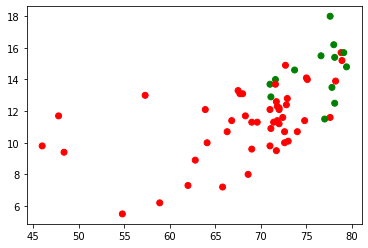

In [28]:
df_X = df1[['Life_expectancy','Schooling']]
np1 = df_X.to_numpy()
npY=df_Y.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(np_Y), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.plot()

**QUESTION 2**

What would be the best features to use? Justify your response

Schooling against Life expectancy because developped country are a lot more stacked and we don't have stand alone samples

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1). This normalization can be performed through various ways.

**TO CODE 2.1**

Normalize df_X. This normalization should perfectly frame the data (aka the minimum and the maximum values of each feature should be respectively 0 and 1).

In [29]:
df_X_norm=df_X
for i in df_X_norm.columns:
    df_X_norm[i]=df_X_norm[i]-np.min(df_X_norm[i])
    df_X_norm[i]=df_X_norm[i]/np.max(df_X_norm[i])
np_X_norm=df_X_norm.to_numpy()

/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/226671308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_norm[i]=df_X_norm[i]-np.min(df_X_norm[i])
/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/226671308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_norm[i]=df_X_norm[i]/np.max(df_X_norm[i])


**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

0.9294871794871794


/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


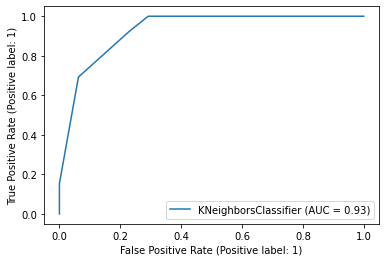

In [30]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf1, np_X_norm, np_Y)
plt.show()


0.9198717948717949


/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


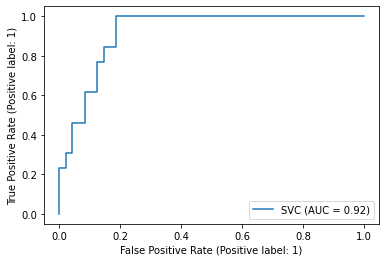

In [31]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear',probability=True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf2, np_X_norm, np_Y)
plt.show()

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9799679487179488


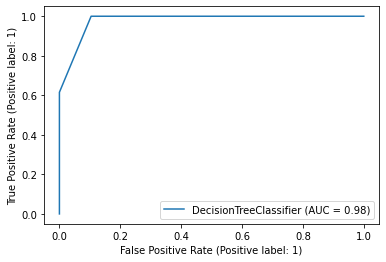

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf3, np_X_norm, np_Y)
plt.show()

/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/3934582148.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf4.fit(np_X_norm, np_Y)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9823717948717948


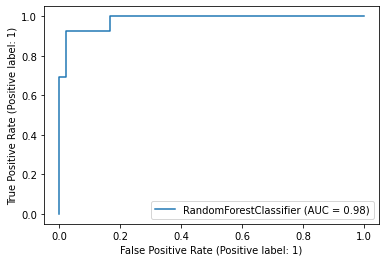

In [33]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf4, np_X_norm, np_Y)
plt.show()

**QUESTION 3**

Identify each used classifiers and specify the used parameters

Describe and explain the results obtained for each ROC curve. What is the relation between the AUC and the ROC curve ? According to the ROC curve, which model is the best if we want to maximize the sensitivity ? And if we want to maximize the specificity ? Compare those results with the AUC. 

**KNN**
parameters : number of neighboor


**SVM**
parameters : c=hardest of the margin, kernel=type of boudary



**Decision tree**
parameters : depht=number max of step in the tree


**Random forest**
parameters : depht=number max of step in each tree, number of estimators in the forest

**AUC and ROC curve :**

AUC is just the area under the ROC curve

maximize sensitivity : Ramdom forest

maximize specificity : Decision tree

For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

**TO DO 2.3**

Plot the decision boundary with df_X for each classifiers

[]

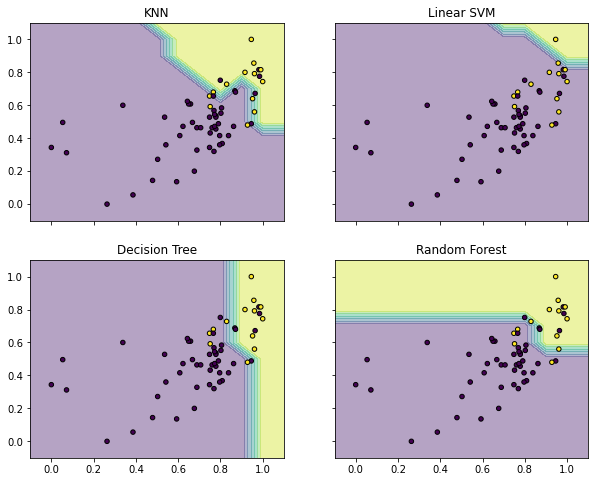

In [34]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.plot()

**QUESTION 4**

What is the main problem of the classification step with this dataset?  

the main problem is that the data are not balanced

In your opinion, which classifier is better suited for this classification task? Justify your response

it's the Random forest classifier since it maximize sensitivity and has the best AUC

## STEP 3: Biases correction and model tuning

In this part, you will focus on improving the AUC scores of the four methods.

Firstable, you will weigh the classes to balance the classifier response. Then you will tune various hyperparameters.

**TO CODE 3.1**

Compute the percentage of "Developed" class against the size the np_Y.

In [48]:
pD=float(sum(np_Y)/len(np_Y))
print('percentage of "Developed" class : ',pD*100,'%')

percentage of "Developed" class :  21.311475409836063 %


SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


**QUESTION 5**

What would be the weight values for each class?

we want $$w_1*p_D=w_0*(1-p_D)=0.5$$ so :

In [36]:
print(0.5/(1-pD),"for the 0 class and ",0.5/pD,"for the 1 class")

0.6354166666666666 for the 0 class and  2.3461538461538463 for the 1 class


**TO CODE 3.2**

Balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

In [37]:
clf2_b = SVC(C=2.0, kernel='linear',probability=True,class_weight='balanced')
clf2_b.fit(np_X_norm, np_Y)
np_Y_pred = clf2_b.predict_proba(df_X_norm)

AUC_SVM_Linear=roc_auc_score(np_Y, np_Y_pred[:,1])
print('SVM AUC score',AUC_SVM_Linear)

clf3_b = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
clf3_b.fit(np_X_norm, np_Y)
np_Y_pred = clf3_b.predict_proba(df_X_norm)

AUC_Dectree=roc_auc_score(np_Y, np_Y_pred[:,1])
print('Decision tree AUC score',AUC_Dectree)

clf4_b = RandomForestClassifier(n_estimators=100, max_depth=3,class_weight='balanced')
clf4_b.fit(np_X_norm, np_Y)
np_Y_pred = clf4_b.predict_proba(df_X_norm)

AUC_Randforest=roc_auc_score(np_Y, np_Y_pred[:,1])
print('Random forest AUC score',AUC_Randforest)

SVM AUC score 0.9182692307692308
Decision tree AUC score 0.9423076923076923
Random forest AUC score 0.9823717948717948


/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/709671228.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf4_b.fit(np_X_norm, np_Y)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: U

[]

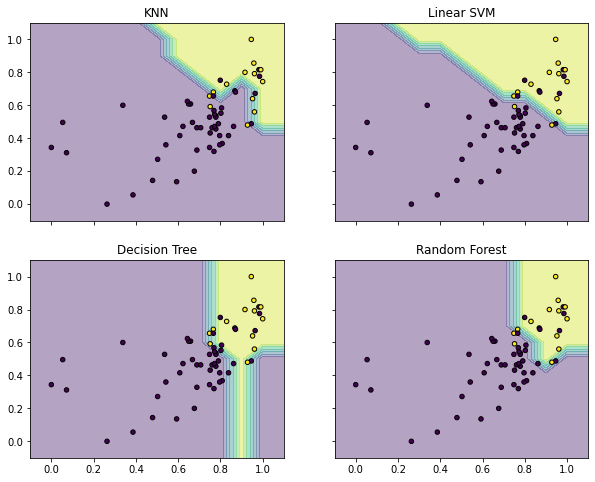

In [38]:
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2_b, clf3_b, clf4_b],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.plot()

**TO CODE 3.3**

Compute the new AUC scores

In [39]:
print('SVM AUC score : ',AUC_SVM_Linear)
print('Decision tree AUC score : ',AUC_Dectree)
print('Random forest AUC score : ',AUC_Randforest)

SVM AUC score :  0.9182692307692308
Decision tree AUC score :  0.9423076923076923
Random forest AUC score :  0.9823717948717948


**QUESTION 6**

*Why did the AUC scores increase? How do you interpret it?* it's not better because we were already counting in probability so weights don't change sensitivity or specificity, we just have more precise AUC

*In your opinion, has the classe balance improved the classification?* comparing to non probability method, probably. But it's smarter to start directly like we did


Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


**TO CODE 3.4**

Test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


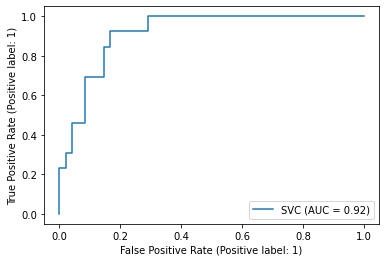

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


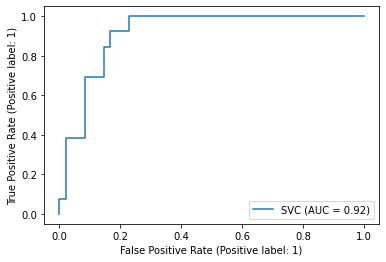

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


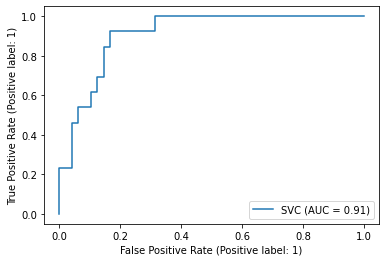

linear SVM AUC score 0.9182692307692308
polynomial SVM AUC score 0.9150641025641025
gaussian SVM AUC score 0.9150641025641026
sigmoid SVM AUC score 0.9086538461538461


In [40]:
clf_svm_1_b = SVC(C=2.0, kernel='poly',probability=True,class_weight='balanced')
clf_svm_1_b.fit(np_X_norm, np_Y)
np_Y_pred = clf_svm_1_b.predict_proba(df_X_norm)
plot_roc_curve(clf_svm_1_b, np_X_norm, np_Y)
plt.show()
AUC_SVM_Poly=roc_auc_score(np_Y, np_Y_pred[:,1])


clf_svm_2_b = SVC(C=2.0, kernel='rbf',probability=True,class_weight='balanced')
clf_svm_2_b.fit(np_X_norm, np_Y)
np_Y_pred = clf_svm_2_b.predict_proba(df_X_norm)
plot_roc_curve(clf_svm_2_b, np_X_norm, np_Y)
plt.show()
AUC_SVM_Gaus=roc_auc_score(np_Y, np_Y_pred[:,1])


clf_svm_3_b = SVC(C=2.0, kernel='sigmoid',probability=True,class_weight='balanced')
clf_svm_3_b.fit(np_X_norm, np_Y)
np_Y_pred = clf_svm_3_b.predict_proba(df_X_norm)
plot_roc_curve(clf_svm_3_b, np_X_norm, np_Y)
plt.show()
AUX_SVP_Sigmoid=roc_auc_score(np_Y, np_Y_pred[:,1])

print('linear SVM AUC score',AUC_SVM_Linear)
print('polynomial SVM AUC score',AUC_SVM_Poly)
print('gaussian SVM AUC score',AUC_SVM_Gaus)
print('sigmoid SVM AUC score',AUX_SVP_Sigmoid)

[]

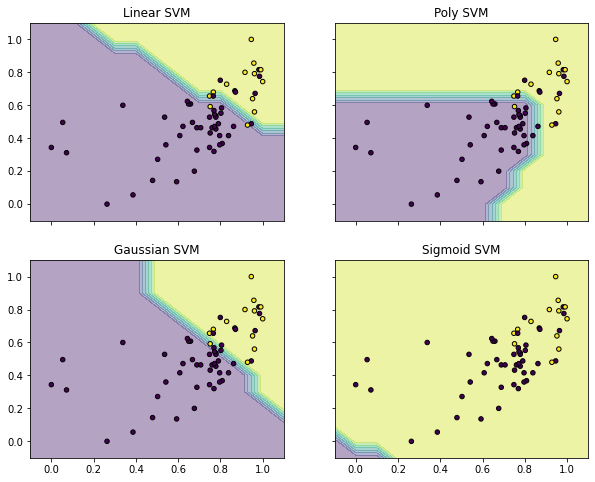

In [41]:
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf2_b, clf_svm_1_b, clf_svm_2_b, clf_svm_3_b],
                        ['Linear SVM', 'Poly SVM', 'Gaussian SVM', 'Sigmoid SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.plot()

**QUESTION 7**

In your opinion, which is the best kernel for this dataset? Justify your response

The linear stills the best one with a slighly better AUC score

**BONUS**

Tune the parameters for Decision Tree and Random Forest algorithms and plot the decision boundaries

In [42]:
clf_DT_1_b = DecisionTreeClassifier(max_depth=200,class_weight='balanced')
clf_DT_1_b.fit(np_X_norm, np_Y)
np_Y_pred = clf_DT_1_b.predict_proba(df_X_norm)

AUC_TunedDectree=roc_auc_score(np_Y, np_Y_pred[:,1])
print('Decision tree AUC score',AUC_Dectree)
print('Tuned decision tree AUC score',AUC_TunedDectree)

clf_RF_1_b = RandomForestClassifier(n_estimators=2000, max_depth=5,class_weight='balanced')
clf_RF_1_b.fit(np_X_norm, np_Y)
np_Y_pred = clf_RF_1_b.predict_proba(df_X_norm)

AUC_Tunedrandforest=roc_auc_score(np_Y, np_Y_pred[:,1])
print('Random forest AUC score',AUC_Randforest)
print('Tuned random forest AUC score',AUC_Tunedrandforest)




/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/3629568114.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF_1_b.fit(np_X_norm, np_Y)


Decision tree AUC score 0.9423076923076923
Tuned decision tree AUC score 1.0
Random forest AUC score 0.9823717948717948
Tuned random forest AUC score 1.0


/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[]

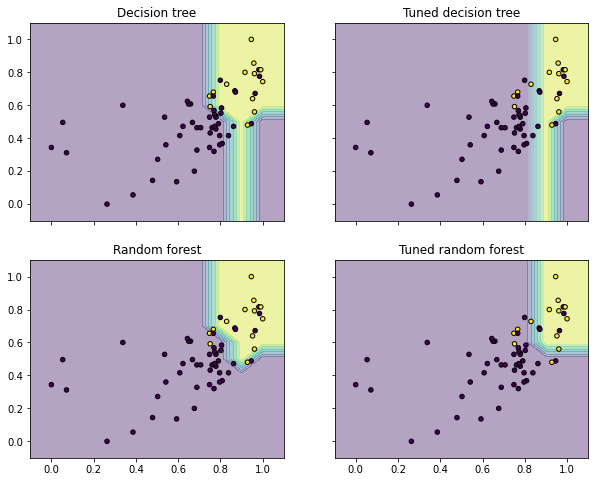

In [43]:
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf3_b, clf_DT_1_b, clf4_b, clf_RF_1_b],
                        ['Decision tree', 'Tuned decision tree', 'Random forest', 'Tuned random forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.plot()

## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**TO CODE 4.1**

Apply your models on the year 2012

/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/2939923454.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X2_norm[i]=df_X2_norm[i]-np.min(df_X2_norm[i])
/var/folders/lc/x5z01dj94tx8cvz5yhryw4vm0000gn/T/ipykernel_20461/2939923454.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X2_norm[i]=df_X2_norm[i]/np.max(df_X2_norm[i])


[]

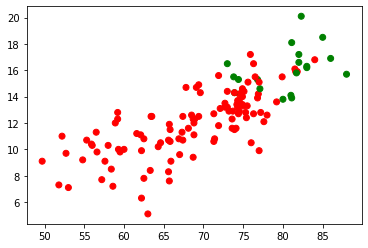

In [44]:

df2 = df[(df.Year == 2012)]
df_X2 = df2[['Life_expectancy','Schooling']]
np12 = df_X2.to_numpy()

df_Status2 = df2[['Status']]

df_Y2 = df_Status2.replace(['Developing', 'Developed'], [0, 1])
np_Y2=df_Y2.to_numpy()

df_X2_norm=df_X2
for i in df_X2_norm.columns:
    df_X2_norm[i]=df_X2_norm[i]-np.min(df_X2_norm[i])
    df_X2_norm[i]=df_X2_norm[i]/np.max(df_X2_norm[i])
np_X2_norm=df_X2_norm.to_numpy()


plt.scatter(np12[:,0], np12[:,1], c=np.squeeze(np_Y2), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.plot()

In [45]:
L_model=[(clf1,'KNN'),(clf2_b,'Linear SVM'),(clf3_b,'Decision Tree'),(clf4_b,'RandomForest'),(clf_svm_1_b,'Polynomial SVM'),(clf_svm_2_b,'Gaussian SVM'),(clf_svm_3_b,'Sigmoid SVM'),(clf_DT_1_b,'Tuned decision tree'),(clf_RF_1_b,'Tuned random forest')]

for i in L_model:
    np_Y2_pred = i[0].predict_proba(df_X2_norm)
    AUC=roc_auc_score(np_Y2, np_Y2_pred[:,1])
    print('prediction with',i[1],AUC)

/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.p

prediction with KNN 0.9062200956937798
prediction with Linear SVM 0.9528708133971292
prediction with Decision Tree 0.8566985645933014
prediction with RandomForest 0.9399521531100479
prediction with Polynomial SVM 0.9476076555023923
prediction with Gaussian SVM 0.9519138755980862
prediction with Sigmoid SVM 0.9495215311004784
prediction with Tuned decision tree 0.6260765550239236
prediction with Tuned random forest 0.9334928229665072


/Users/yohanismael/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**QUESTION 8**

Are your models still relevant in the year 2012?

Yes except for decision tree, and it's worse when the depth grows ( overfitting of the model )
